In [1]:
%pwd

u'/Users/chaoxu/code/local-spark/Analysis/qiancheng'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/chaoxu/code/local-spark/Data/qiancheng.csv")

/Users/chaoxu/.pyenv/versions/anaconda2-4.3.1/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (2,20,67,71) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.columns

Index([u'maxent_id', u'cracked.anomaly', u'cracked.value', u'did.15m.anomaly',
       u'did.15m.value', u'did.1d.anomaly', u'did.1d.value', u'did.1h.anomaly',
       u'did.1h.value', u'did.1m.anomaly', u'did.1m.value', u'did.5m.anomaly',
       u'did.5m.value', u'did.6h.anomaly', u'did.6h.value', u'did.7d.anomaly',
       u'did.7d.value', u'event_id', u'event_type', u'idcIP.anomaly',
       u'idcIP.value', u'ipGeo', u'ipGeo.15m.anomaly', u'ipGeo.15m.value',
       u'ipGeo.1d.anomaly', u'ipGeo.1d.value', u'ipGeo.1h.anomaly',
       u'ipGeo.1h.value', u'ipGeo.1m.anomaly', u'ipGeo.1m.value',
       u'ipGeo.5m.anomaly', u'ipGeo.5m.value', u'ipGeo.6h.anomaly',
       u'ipGeo.6h.value', u'ipGeo.7d.anomaly', u'ipGeo.7d.value', u'ipSeg24',
       u'ipSeg24.15m.anomaly', u'ipSeg24.15m.value', u'ipSeg24.1d.anomaly',
       u'ipSeg24.1d.value', u'ipSeg24.1h.anomaly', u'ipSeg24.1h.value',
       u'ipSeg24.1m.anomaly', u'ipSeg24.1m.value', u'ipSeg24.5m.anomaly',
       u'ipSeg24.5m.value', u'ipSeg2

In [24]:
# def show_missing():
#     missing = df.columns[df.isnull().any()].tolist()
#     return missing
# df[show_missing()].isnull().sum()

In [8]:
from datetime import datetime, timedelta
df["timestamp"] = pd.to_datetime(df['timestamp'], unit='ms', utc=True)
df["timestamp"] = pd.DatetimeIndex(df["timestamp"]) + timedelta(hours=8)
df = df.sort_values(by="timestamp")

In [2]:
df.head()

NameError: name 'df' is not defined

In [10]:
one_zro_cols = ['crack_value','proxyIP.value','uaMismatch.value']

In [4]:
df[['label']]=df[['label']].fillna(0)

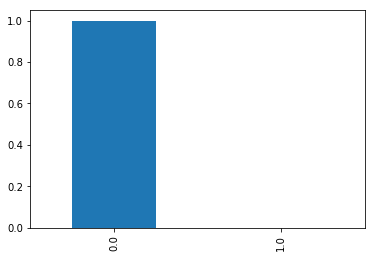

In [5]:
df.label.value_counts(normalize=True).plot(kind='bar')
plt.show()

In [1]:
df.label.value_counts(normalize=True)

NameError: name 'df' is not defined

In [10]:
df.maxent_id.loc[df.label == 1].drop_duplicates().count()

478

In [33]:
df.maxent_id.drop_duplicates().count()

1301410

In [12]:
import re
value = re.compile('.*.value$')
value_match = np.vectorize(lambda x:bool(value.match(x)))

In [13]:
# value_ = df.columns.difference(one_zro_cols)
values = df.columns.values[value_match(df.columns.values)]

In [26]:
one_zro_cols = ['cracked.value','proxyIP.value','uaMismatch.value']
for i in one_zro_cols:
    print "cos is {0}---".format(i)
    print df[i].value_counts(normalize=True)
    print "\n"
    print "label = 0 cos is {0}".format(i)
    print df[i].loc[df.label ==0].value_counts(normalize=True)
    print "\n"
    print "label = 1 cos is {0}".format(i)
    print df[i].loc[df.label ==1].value_counts(normalize=True)
    print "-------------\n"

cos is cracked.value
False    0.963086
True     0.036914
Name: cracked.value, dtype: float64


label = 0 cos is cracked.value
False    0.963104
True     0.036896
Name: cracked.value, dtype: float64


label = 1 cos is cracked.value
False    0.943772
True     0.056228
Name: cracked.value, dtype: float64


cos is proxyIP.value
False    0.944965
True     0.055035
Name: proxyIP.value, dtype: float64


label = 0 cos is proxyIP.value
False    0.944965
True     0.055035
Name: proxyIP.value, dtype: float64


label = 1 cos is proxyIP.value
False    0.945597
True     0.054403
Name: proxyIP.value, dtype: float64


cos is uaMismatch.value
False    0.980437
True     0.019563
Name: uaMismatch.value, dtype: float64


label = 0 cos is uaMismatch.value
False    0.980439
True     0.019561
Name: uaMismatch.value, dtype: float64


label = 1 cos is uaMismatch.value
False    0.978914
True     0.021086
Name: uaMismatch.value, dtype: float64




In [30]:
anormaly = re.compile('.*anomaly$')
anormaly_match = np.vectorize(lambda x:bool(anormaly.match(x)))
anormaly_cols = df.columns.values[anormaly_match(df.columns.values)]

In [32]:
for col in anormaly_cols:
    print "label = 0 --> col is {0} \n".format(col)
    print df.loc[df.label == 0][col].describe()
    print "label = 1 --> col is {0} \n".format(col)
    print df.loc[df.label == 1][col].describe()
    print "-----\n"

label = 0 --> col is cracked.anomaly 

count    2799235.0
mean           1.0
std            0.0
min            1.0
25%            1.0
50%            1.0
75%            1.0
max            1.0
Name: cracked.anomaly, dtype: float64
label = 1 --> col is cracked.anomaly 

count    2561.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: cracked.anomaly, dtype: float64
-----

label = 0 --> col is did.15m.anomaly 

count    2.793066e+06
mean     1.134784e+00
std      5.109642e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+03
Name: did.15m.anomaly, dtype: float64
label = 1 --> col is did.15m.anomaly 

count    2557.000000
mean        1.144310
std         0.623531
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        10.000000
Name: did.15m.anomaly, dtype: float64
-----

label = 0 --> col is did.1d.anomaly 

count    2.79282

In [35]:
for col in values:
    print "label = 1 --> col is {0} \n".format(col)
    print df.loc[df.label == 1][col].describe()

label = 1 --> col is cracked.value 

count      2561
unique        2
top       False
freq       2417
Name: cracked.value, dtype: object
label = 1 --> col is did.15m.value 

count    2557.000000
mean        1.070395
std         0.290249
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: did.15m.value, dtype: float64
label = 1 --> col is did.1d.value 

count    2556.000000
mean        1.287167
std         0.768565
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        10.000000
Name: did.1d.value, dtype: float64
label = 1 --> col is did.1h.value 

count    2557.000000
mean        1.099726
std         0.365561
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         6.000000
Name: did.1h.value, dtype: float64
label = 1 --> col is did.1m.value 

count    2557.000000
mean        1.018772
std         0.138598
min         1.000000
25%         1.000000
50% 

In [36]:
for col in values:
    print "label = all --> col is {0} \n".format(col)
    print df[col].describe()

label = all --> col is cracked.value 

count     2801796
unique          2
top         False
freq      2698371
Name: cracked.value, dtype: object
label = all --> col is did.15m.value 

count    2.795623e+06
mean     1.046973e+00
std      2.477400e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.400000e+01
Name: did.15m.value, dtype: float64
label = all --> col is did.1d.value 

count    2.795381e+06
mean     1.166758e+00
std      6.917213e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      7.200000e+01
Name: did.1d.value, dtype: float64
label = all --> col is did.1h.value 

count    2.795543e+06
mean     1.072249e+00
std      3.204005e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      2.000000e+01
Name: did.1h.value, dtype: float64
label = all --> col is did.1m.value 

count    2.795662e+06
mean     1.009475e+00
std      1.010663e-01
m